In [1]:
# For Data Cleaning and Manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

#For Warnings 
import warnings 
warnings.filterwarnings('ignore')

#For Options 
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows', None)

In [2]:
car_details = pd.read_csv('vehicles_us_5000.csv')

In [3]:
car_details.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
car_details.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5092,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11
5093,4800,2012.0,volkswagen jetta,good,4.0,gas,138000.0,automatic,sedan,silver,NaN,2018-07-19,39
5094,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
5095,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
5096,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44


In [5]:
# Lets check for duplicate rows .

duplicated_val_series = car_details.duplicated(keep = 'last')
car_details[duplicated_val_series].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [6]:
# Remove duplicated values from car details v3 dataframe. 

new_car_details = car_details[~duplicated_val_series]
new_car_details.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
new_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 5096
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5097 non-null   int64  
 1   model_year    4740 non-null   float64
 2   model         5097 non-null   object 
 3   condition     5097 non-null   object 
 4   cylinders     4603 non-null   float64
 5   fuel          5097 non-null   object 
 6   odometer      4354 non-null   float64
 7   transmission  5097 non-null   object 
 8   type          5097 non-null   object 
 9   paint_color   4194 non-null   object 
 10  is_4wd        2655 non-null   float64
 11  date_posted   5097 non-null   object 
 12  days_listed   5097 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 557.5+ KB


In [8]:
#  Lets check 'object' type of columns 

def object_columns(df) : 
    o = (df.dtypes == 'object') 
    object_cols = o[o].index 
    
    return f"Categorical Columns:{object_cols}"

object_columns(new_car_details)


"Categorical Columns:Index(['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color',\n       'date_posted'],\n      dtype='object')"

In [9]:
def extract_num(s):
    return "".join(x for x in str(s) if x.isdigit())

In [10]:
new_car_details["odometer"] = new_car_details["odometer"].map(extract_num)

In [11]:
new_car_details.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,1450000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,887050,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,1100000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,809030,automatic,sedan,black,NaN,2019-04-02,28


In [12]:
# Convert str to numerical 

def str_to_num(col) :
    return pd.to_numeric(col)

new_car_details['odometer'] = new_car_details['odometer'].map(str_to_num)

In [13]:
viz_df = new_car_details.copy()

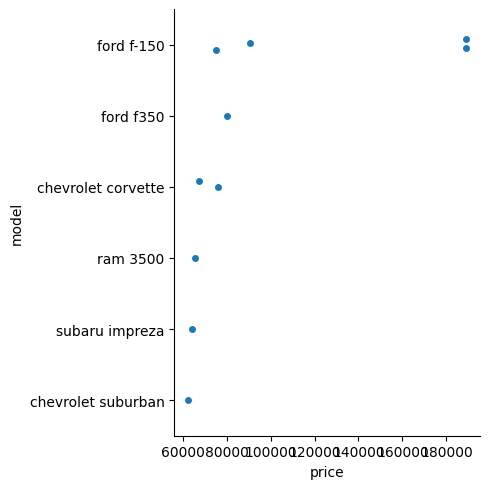

In [14]:
# Top 10 most expensive vehicle 

top_10_most_expensive_df = viz_df.sort_values(by = 'price' , ascending = False) 
top_10_most_expensive_df = top_10_most_expensive_df[:10]

sns.catplot(x = 'price' ,  y = 'model' , data = top_10_most_expensive_df)

In [15]:
new_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 5096
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5097 non-null   int64  
 1   model_year    4740 non-null   float64
 2   model         5097 non-null   object 
 3   condition     5097 non-null   object 
 4   cylinders     4603 non-null   float64
 5   fuel          5097 non-null   object 
 6   odometer      4354 non-null   float64
 7   transmission  5097 non-null   object 
 8   type          5097 non-null   object 
 9   paint_color   4194 non-null   object 
 10  is_4wd        2655 non-null   float64
 11  date_posted   5097 non-null   object 
 12  days_listed   5097 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 557.5+ KB


In [16]:
def object_columns(df) : 
    o = (df.dtypes == 'object') 
    object_cols = o[o].index 
    
    return f"Categorical Columns:{object_cols}"

object_columns(new_car_details)

"Categorical Columns:Index(['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color',\n       'date_posted'],\n      dtype='object')"

In [17]:
# Check unique vals in categorical columms 
def unique_cols(df) : 
    o = (df.dtypes == 'object') 
    obj_col = o[o].index 
    for i in obj_col: 
        print(f"{i} : {df[i].unique()}")
        
unique_cols(new_car_details)

model : ['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet ca

In [18]:
filled_car_details = new_car_details.copy() 

<AxesSubplot: >

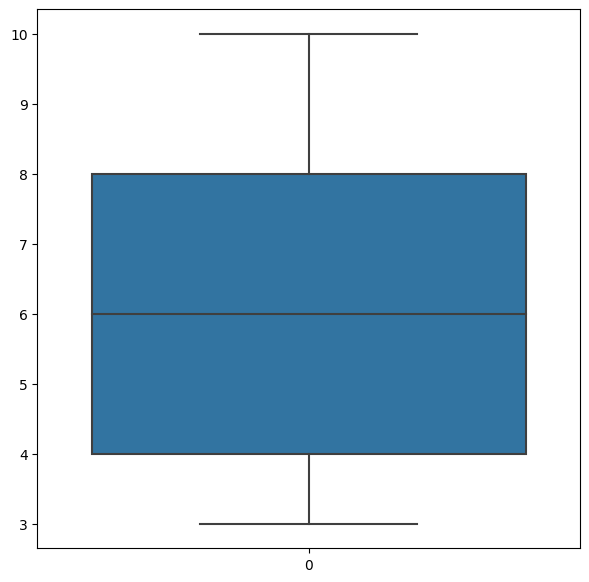

In [19]:
# Lets check for cylinders column. 

fig,ax = plt.subplots(figsize = (7,7))
sns.boxplot(filled_car_details.cylinders)

<AxesSubplot: xlabel='cylinders', ylabel='Density'>

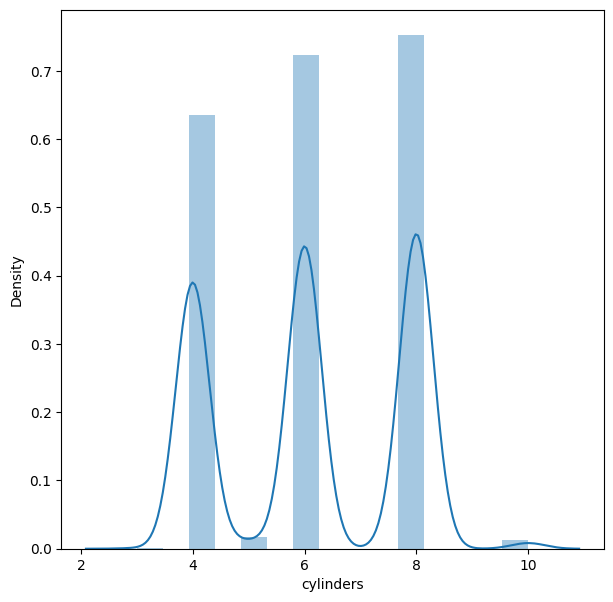

In [20]:
fig,ax = plt.subplots(figsize = (7,7))
sns.distplot(filled_car_details.cylinders)

<AxesSubplot: >

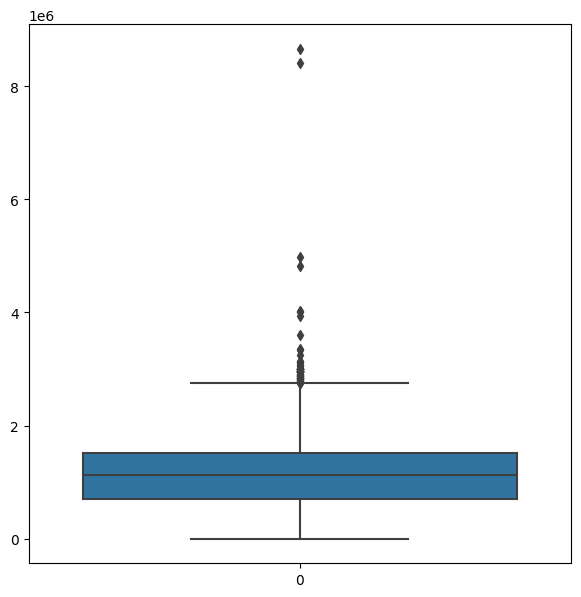

In [21]:
# Lets check for odometer column. 

fig,ax = plt.subplots(figsize = (7,7))
sns.boxplot(filled_car_details.odometer)

<AxesSubplot: xlabel='odometer', ylabel='Density'>

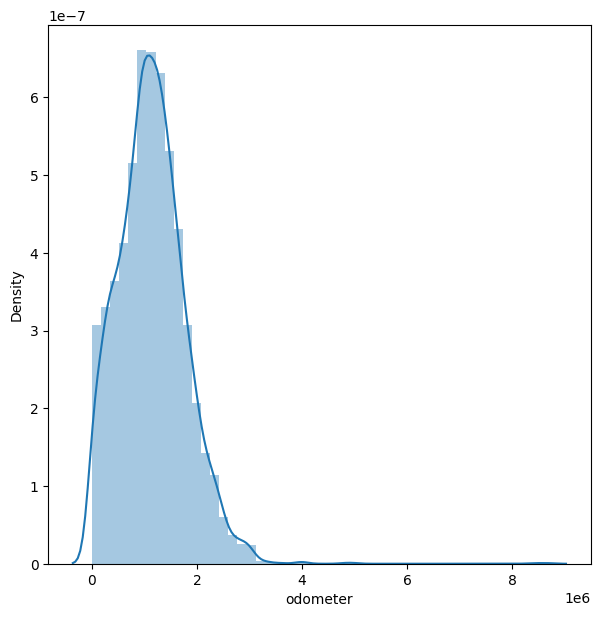

In [22]:
fig,ax = plt.subplots(figsize = (7,7))
sns.distplot(filled_car_details.odometer)

In [23]:
filled_car_details.isnull().sum()

price              0
model_year       357
model              0
condition          0
cylinders        494
fuel               0
odometer         743
transmission       0
type               0
paint_color      903
is_4wd          2442
date_posted        0
days_listed        0
dtype: int64

In [24]:
del filled_car_details['is_4wd']
filled_car_details = filled_car_details.dropna()

In [25]:
filled_car_details.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,1100000.0,automatic,sedan,red,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,809030.0,automatic,sedan,black,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,579540.0,automatic,sedan,black,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,792120.0,automatic,sedan,white,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,1094730.0,automatic,SUV,black,2019-01-07,68


In [26]:
filled_car_details.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
date_posted     0
days_listed     0
dtype: int64

In [27]:
filled_car_details.groupby('fuel')['model'].describe()

,count,unique,top,freq
fuel,,,,
diesel,232,21,ram 2500,51
gas,2770,99,ford f-150,174
hybrid,22,7,toyota prius,16
other,7,7,ford mustang,1


<AxesSubplot: xlabel='condition', ylabel='count'>

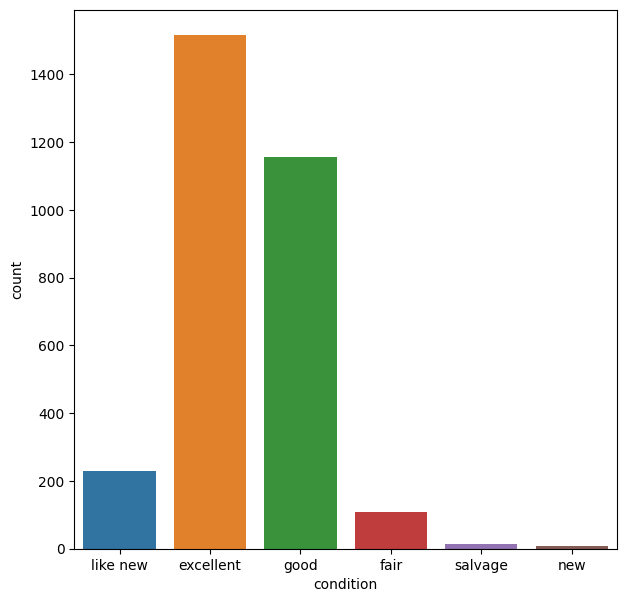

In [28]:
fig,ax = plt.subplots(figsize = (7,7))
sns.countplot(x = 'condition'  ,data = filled_car_details)

<AxesSubplot: xlabel='transmission', ylabel='count'>

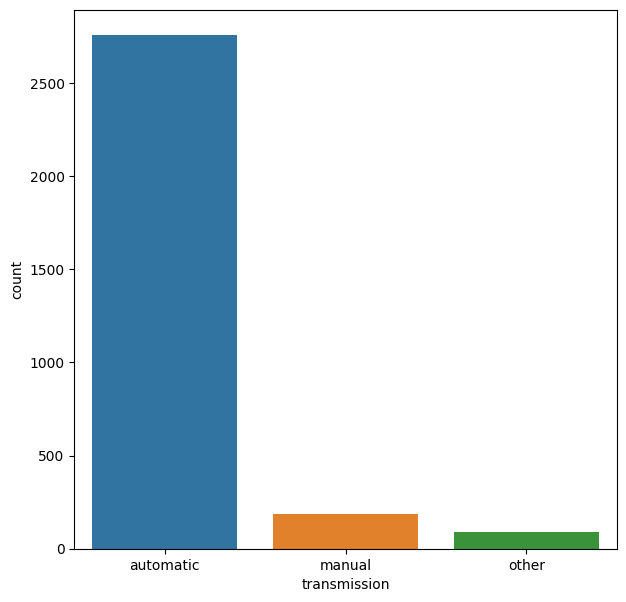

In [29]:
fig,ax = plt.subplots(figsize = (7,7))
sns.countplot(x = 'transmission'  ,data = filled_car_details)

<AxesSubplot: xlabel='model_year', ylabel='count'>

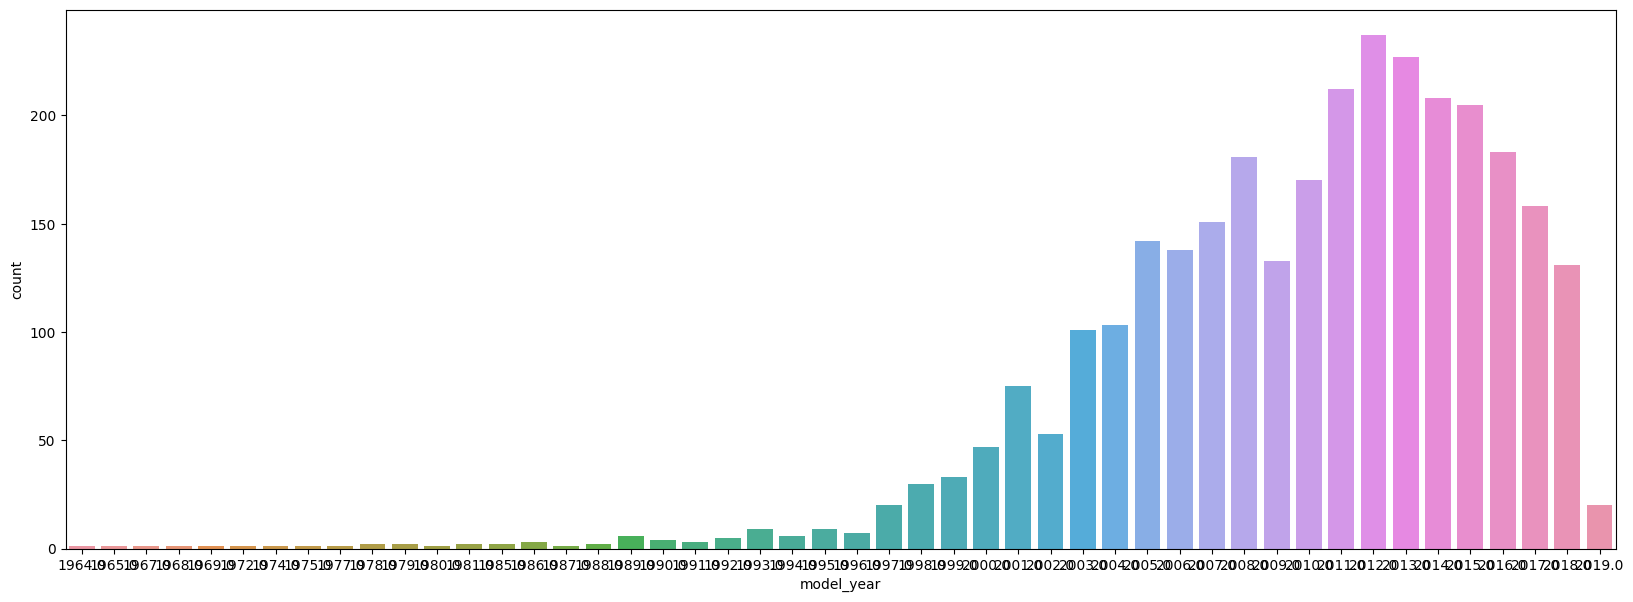

In [30]:
fig,ax = plt.subplots(figsize = (20,7))
sns.countplot(x = 'model_year'  ,data = filled_car_details)

In [31]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5097 non-null   int64  
 1   model_year    4740 non-null   float64
 2   model         5097 non-null   object 
 3   condition     5097 non-null   object 
 4   cylinders     4603 non-null   float64
 5   fuel          5097 non-null   object 
 6   odometer      4354 non-null   float64
 7   transmission  5097 non-null   object 
 8   type          5097 non-null   object 
 9   paint_color   4194 non-null   object 
 10  is_4wd        2655 non-null   float64
 11  date_posted   5097 non-null   object 
 12  days_listed   5097 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 517.8+ KB


In [32]:
# We will 'set name' column as index now since it wont help in predictions. 
car_data_df_copy = car_details.copy()
car_data_df = car_data_df_copy.dropna()
car_data_df = car_data_df.reset_index(drop = True)

In [33]:
car_data_df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [34]:
car_data_df = car_data_df.set_index('model')

In [35]:
# Object cols of car_data_df 

o = (car_data_df.dtypes == 'object')
object_cols = o[o].index 

print(f"Categorical Columns : {object_cols}")

Categorical Columns : Index(['condition', 'fuel', 'transmission', 'type', 'paint_color',
       'date_posted'],
      dtype='object')


In [36]:
# We will used previously written function in this notebook to get unique values out of object type of columns.

unique_cols(car_data_df)

condition : ['excellent' 'like new' 'good' 'fair' 'salvage' 'new']
fuel : ['gas' 'diesel' 'hybrid' 'other']
transmission : ['automatic' 'other' 'manual']
type : ['sedan' 'SUV' 'pickup' 'truck' 'hatchback' 'wagon' 'other' 'coupe'
 'offroad' 'convertible']
paint_color : ['black' 'red' 'white' 'grey' 'brown' 'silver' 'blue' 'orange' 'custom'
 'green' 'yellow' 'purple']
date_posted : ['2018-06-20' '2019-01-07' '2018-09-17' '2019-01-31' '2018-12-30'
 '2018-08-16' '2019-04-09' '2019-01-05' '2019-02-19' '2018-12-25'
 '2019-03-31' '2019-01-12' '2018-11-18' '2018-07-19' '2019-01-30'
 '2018-07-15' '2019-03-14' '2018-05-29' '2018-07-27' '2019-02-28'
 '2018-09-25' '2019-03-13' '2018-06-30' '2018-06-16' '2018-12-14'
 '2018-12-24' '2019-04-02' '2018-09-10' '2019-02-27' '2018-09-22'
 '2018-11-08' '2018-08-19' '2019-03-01' '2018-11-15' '2019-01-13'
 '2018-08-11' '2018-08-03' '2018-05-26' '2018-07-28' '2018-06-26'
 '2018-12-20' '2018-11-10' '2018-09-08' '2018-08-17' '2018-05-23'
 '2019-01-25' '2018-06-

In [37]:
# We will use Ordinal Encoder 

from sklearn.preprocessing import OrdinalEncoder 

enc = OrdinalEncoder()
car_data_df[object_cols] = enc.fit_transform(car_data_df[object_cols])

car_data_df.head()

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
model,,,,,,,,,,,,
chrysler 300,14990,2014.0,0.0,6.0,1.0,57954.0,0.0,7.0,0.0,1.0,49.0,15
honda pilot,15990,2013.0,0.0,6.0,1.0,109473.0,0.0,0.0,0.0,1.0,247.0,68
chevrolet silverado 1500,19500,2011.0,0.0,8.0,1.0,128413.0,0.0,6.0,0.0,1.0,136.0,38
gmc yukon,12990,2009.0,0.0,8.0,1.0,132285.0,0.0,0.0,0.0,1.0,270.0,24
ram 1500,14990,2010.0,0.0,8.0,1.0,130725.0,0.0,6.0,8.0,1.0,239.0,13


In [38]:
car_data_df.dtypes

price             int64
model_year      float64
condition       float64
cylinders       float64
fuel            float64
odometer        float64
transmission    float64
type            float64
paint_color     float64
is_4wd          float64
date_posted     float64
days_listed       int64
dtype: object

In [39]:
# Lets check correlation matrix. 
present_price_corr  = car_data_df.corrwith(car_data_df.price)
present_price_corr

price           1.000000
model_year      0.675595
condition      -0.074385
cylinders       0.201943
fuel           -0.255615
odometer       -0.558519
transmission    0.007197
type            0.207649
paint_color    -0.027675
is_4wd               NaN
date_posted    -0.041572
days_listed    -0.024128
dtype: float64

<AxesSubplot: >

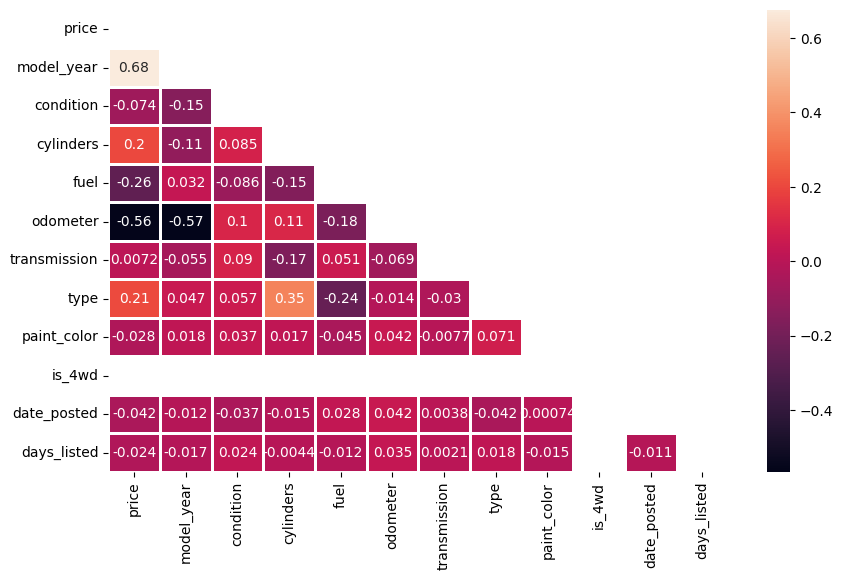

In [40]:
# Plot correlation matrix with all columms.
correlation  = car_data_df.corr()

mask = np.triu(np.ones_like(correlation , dtype = bool))

plt.figure(figsize = (10,6))
sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)

In [41]:
features = car_data_df.drop('price' ,axis = 1)
label = car_data_df['price']

In [42]:
# Lets create a linear regression model 

from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()

lr_model.fit(features , label) 

score = lr_model.score(features ,label)

print(f"Score with linear regression : {score}")

Score with linear regression : 0.6755086942711386
